## Introduction

The dataset consists of two classes.
Class positive means that the failure occurred due to components
related to APS. And class negative means the fault is
unrelated to APS components.
The Air Pressure System (APS) is an essential part
used in heavy vehicles where compressed air is used to
press a piston that applies pressure to the brake pad to
stop the vehicle. Air brakes or more formally known as Pressurized air brake system uses air pressure system
(APS). This system is particularly useful in
vehicles with multiple trailers. advantages of having
an APS that is not a hydraulic system is that air can be found in abundance in nature and also because of its
suitability for various trailers.
The purpose of this
data set is to correctly predict whether the cause of
failure is due to APS or not. The forecast result is
highly beneficial for the manufacturer as it will isolate the failed component in the shortest possible time. While the
APS is linked to several other components, it is more
difficult to identify whether the APS system is directly
fault-related or not.

My work consists of 4 sessions.
The first is to check the characteristics of the dataset (size, number of attributes, missing values, number of observations) for a better understanding of what it would handle.
The second is to explore the dataset and apply data preparation.
The third is to apply PCA to establish the minimum number of features needed for retaining 99.5% variance in the 
data and then implement PCA to dimensionally reduce the data to the number of features that you 
have discovered.
Fourth explanation in my own words about what the Curse of the Dimension is.



Columns Value D type Description 
Class neg/pos String/Object The dataset’s positive 
class consists of 
component failures for a 
specific component of 
the APS system. The 
negative class consists 
of trucks with failures 
for components not 
related to the APS 
All Other Columns 0 to 8.584298e+09 float Component Sensor 
result 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("data/aps_failure_set.csv", na_values='na')

# 1 - Session
## Undestanding the data and the Characterisation.
In this part I want to check the dataset characteristics such as index type, columns, non-null values, size and memory usage, mean, median and mode, 5 Number Summary and dtype for a better understanding of what I will handle.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [3]:
df.shape

(60000, 171)

In [4]:
df.size

10260000

In [5]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [6]:
df.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0
59999,neg,40222,NaN,6.980000e+02,628.0,0.0,0.0,0.0,0.0,0.0,...,440066.0,183200.0,344546.0,254068.0,225148.0,158304.0,170384.0,158.0,0.0,0.0


##### Observation:
After checking the first and last lines of the dataset, I can already see that I have missing value to deal with when I start cleaning the dataset.

In [7]:
df.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,NaN,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,NaN,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,NaN,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000


In [8]:
df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

# 2 - Session
## Cleaning the Data Set and EDA
In this session I will explore the dataset and apply data preparation.[2],[6],[8]

In [9]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


I will check if the data set contains duplicate values to get accurate counts.

In [10]:
df_duplicated = df[df.duplicated()]
df_duplicated.shape

(0, 171)

As the data set has not duplicate values, I can start to check the count values of the features.

In [11]:
df.count() 

class     60000
aa_000    60000
ab_000    13671
ac_000    56665
ad_000    45139
          ...  
ee_007    59329
ee_008    59329
ee_009    59329
ef_000    57276
eg_000    57277
Length: 171, dtype: int64

As the dataset consists of two classes.
Positive class means failure occurred due to components
related to APS. And negative class means the failure is
not related to components of APS, I want to check how many occurrences I have from each.

In [12]:
df.value_counts("class")

class
neg    59000
pos     1000
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Label Distribution')

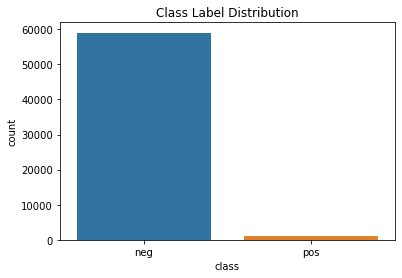

In [13]:
sns.countplot(df['class'])
plt.title('Class Label Distribution')

As I can see, this dataset is highly imbalanced as the number of Negative (59.000) are much more than positive (1.000).

I will have to balance the dataset if I want to use Machine Learning models to predict

In [14]:
df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

As I can see missing value is a major concern as the data set contains some columns with a High number of Missing Values, some of them has more than 80% of the values missing.

I am going to check how many columns with more than 50% contain in my dataset and I'm going to remove them because filling a column with that amount of missing values can bring unexpected and biased results to my analysis.

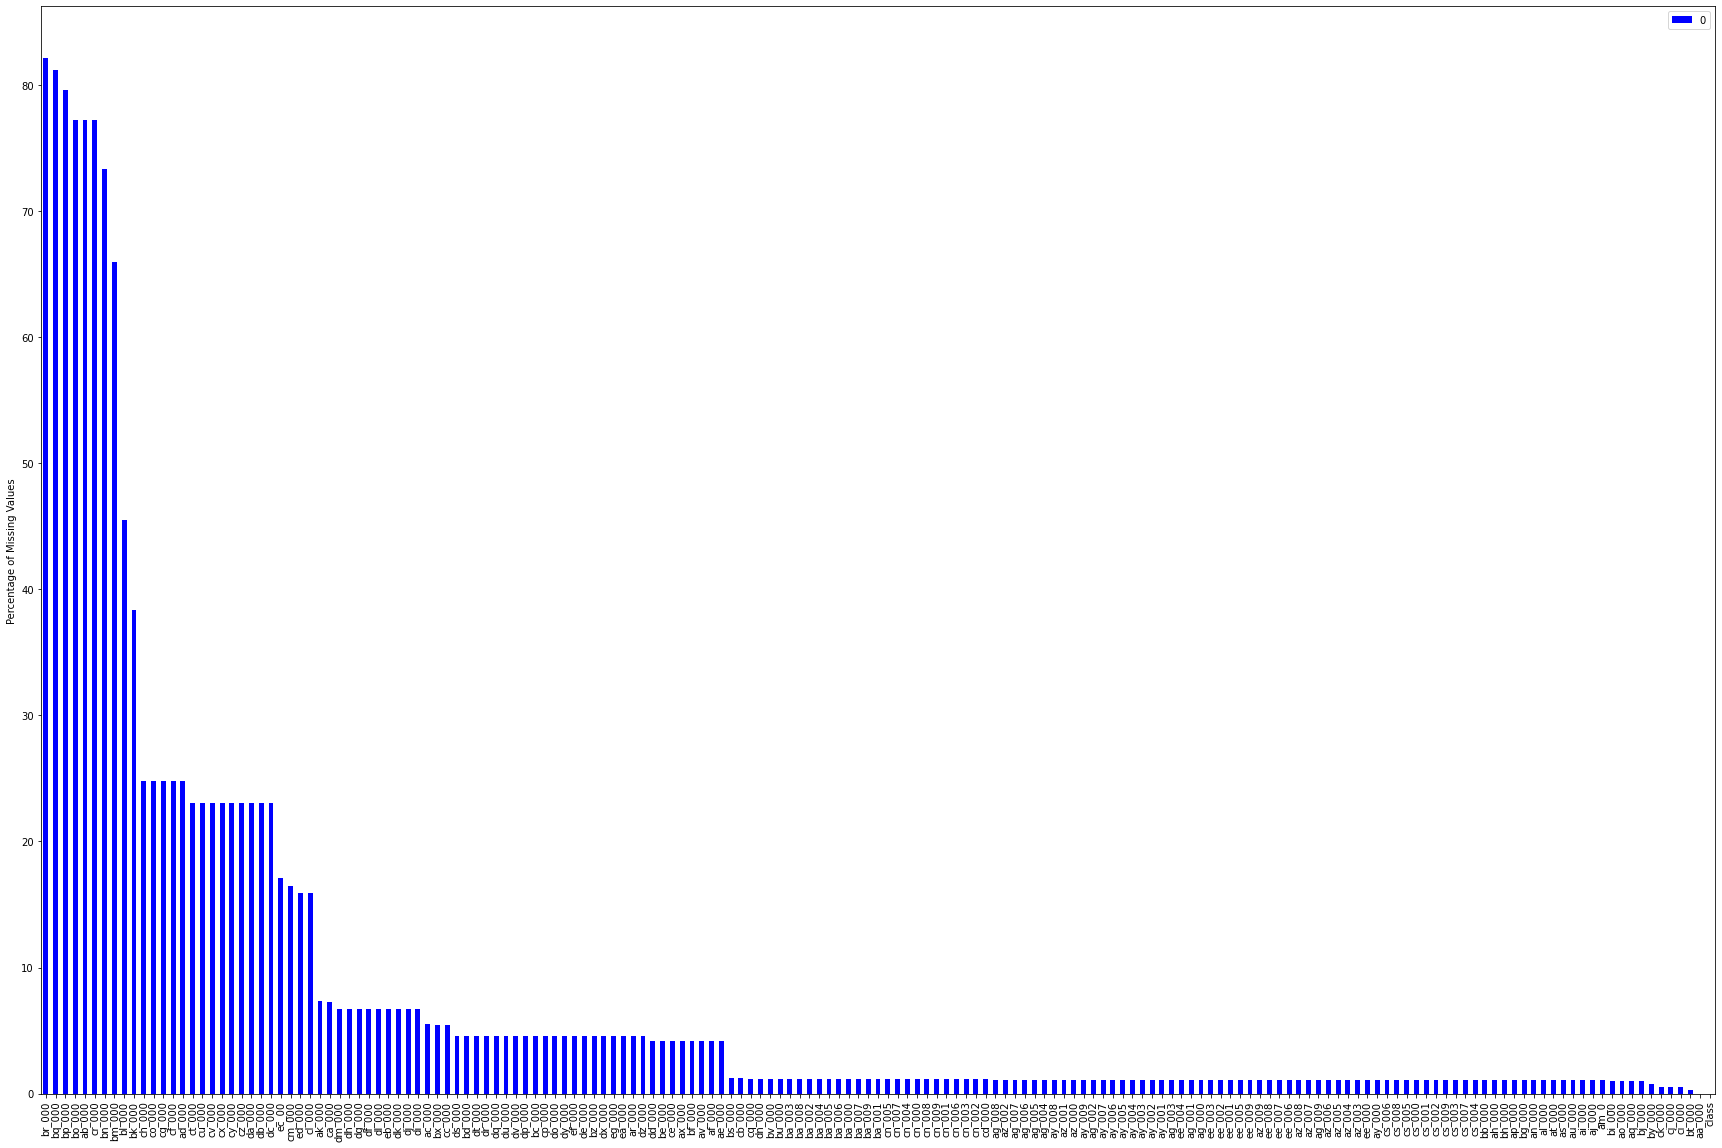

In [15]:
missingvalues = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
missingvalues.plot.bar(color="Blue", figsize=(30,20))
plt.ylabel("Percentage of Missing Values")
plt.show()

To find out how many columns I have with more than 50% I created another version of the dataframe where I divide the values of missing values with the original dataframe (data.shape) multiplied by 100 to transform in percentage and put them in descending order.

After putting the missing values in percentage, I created another dataframe to get only the columns with more than 50% missing values.

In [16]:
df_missinghigh = missingvalues[missingvalues[0]>50]
df_missinghigh

,0
br_000,82.106667
bq_000,81.203333
bp_000,79.566667
bo_000,77.221667
ab_000,77.215000
cr_000,77.215000
bn_000,73.348333
bm_000,65.915000


I decided to drop the columns once there are only 8 that do not represent 5% of the columns (171 columns) and with that I will not compromise the dataset.

In [17]:
df_missingcolumns = df_missinghigh.index
df_missingcolumns

Index(['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000',
       'bm_000'],
      dtype='object')

In [18]:
df_after_missinghigh = df.drop(df_missingcolumns, axis=1)

Shape after drop x Shape before drop.

In [19]:
print(df_after_missinghigh.shape)
print(df.shape)

(60000, 163)
(60000, 171)


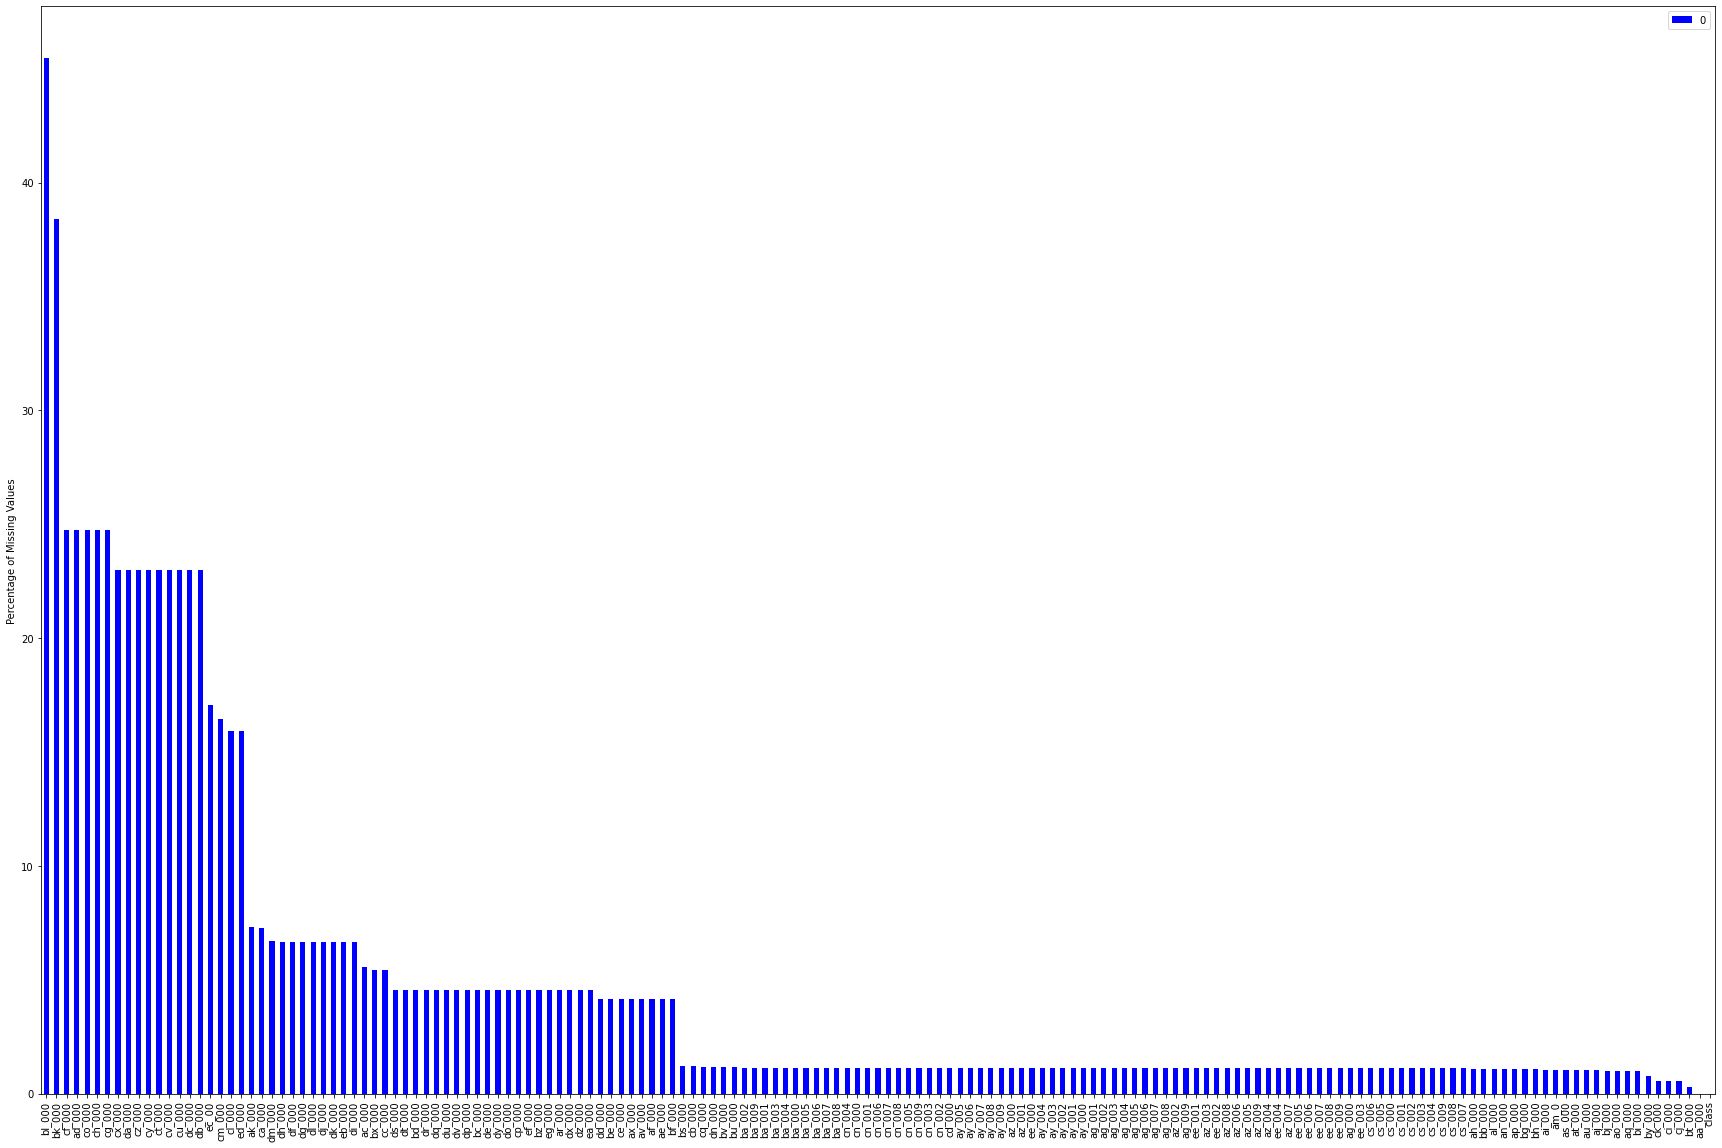

In [20]:
missingvaluesafter = df_after_missinghigh.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
missingvaluesafter.plot.bar(color="Blue", figsize=(30,20))
plt.ylabel("Percentage of Missing Values")
plt.show()

Now that my data set only has columns with the percentage of missing values below 50%, I will apply the mean or median technique to imputing the values that are missing.

But first I have to check the skewness of the dataset to decide if I will fill in the missing values with mean or median.


In [21]:
df_after_missinghigh.skew().sort_values(ascending=True)

C:\Users\rapha\AppData\Local\Temp\ipykernel_30132\676247107.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_after_missinghigh.skew().sort_values(ascending=True)


cd_000      0.000000
cb_000      0.664568
ca_000      0.722104
ac_000      1.784845
bs_000      2.006974
             ...    
dh_000    202.907014
ad_000    212.459406
co_000    212.459406
cf_000    212.459407
cs_009    243.531177
Length: 162, dtype: float64

As the dataset contains only one variable with the perfect distribution and the other variables are skewed, I will fill in the missing values with the median.

## Median Imputation

In [49]:
df_final_medianimput = df_after_missinghigh.fillna(df_after_missinghigh.median())
df_final_medianimput.head()

C:\Users\rapha\AppData\Local\Temp\ipykernel_30132\2897291575.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final_medianimput = df_after_missinghigh.fillna(df_after_missinghigh.median())


,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [50]:
df_final_medianimput.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

,0
class,0.0
da_000,0.0
cp_000,0.0
cq_000,0.0
cs_000,0.0
...,...
ba_003,0.0
ba_004,0.0
ba_005,0.0
ba_006,0.0


# 3 - PCA
#### Principal component analysis, or PCA, is a statistical procedure that allows summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

I will apply PCA to establish the minimum number of features needed to retain 99.5% variance in the data as requested, and then implement PCA to dimensionally reduce the data to the number of features I have discovered. I will perform two models, one model without performing the normalization and the other with normalization to compare the result of the dimensionality reduction.

As I do not have the context or meaning of the values, I will apply L2 normalization to modify the dataset values so that in each row the sum of squares is always up to 1, in other words, the values of the features/variables become proportional to each other without change the shape of the dataset.[3],[5]

## PCA without L2 Normalize

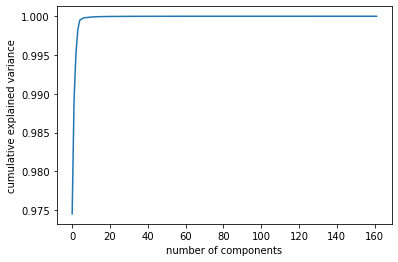

In [51]:
from sklearn.decomposition import PCA

df_nolabel_medianimput = df_final_medianimput.drop(["class"], axis=1)
pca = PCA().fit(df_nolabel_medianimput) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [52]:
pca = PCA(0.995).fit(df_nolabel_medianimput)
pca.n_components_

3

After applying the PCA to the model without normalize, only 3 features are required to explain the 99,5% variance of the data.

In [53]:
pca = PCA(3)
projected_medianimput = pca.fit_transform(df_nolabel_medianimput)

In [54]:
projected_medianimput.shape

(60000, 3)

In [55]:
df_pca_medianimput = pd.DataFrame(projected_medianimput, columns =['C1_median', 'C2_median', 'C3_median'])
df_pca_medianimput["class"] = df["class"]
df_pca_medianimput.head()

,C1_median,C2_median,C3_median,class
0,1.794494e+09,3.188451e+05,-14217.011224,neg
1,-3.361925e+08,-5.373788e+06,-283888.286465,neg
2,-3.361921e+08,-5.627208e+06,-276668.273783,neg
3,-3.361691e+08,-6.271395e+06,-262924.260162,neg
4,-3.362450e+08,-4.904801e+06,-310153.589805,neg


## PCA after Normalize

In [56]:
import sklearn.preprocessing as preproc

In [57]:
df_final_medianScal = df_final_medianimput.drop(["class"], axis=1)
df_final_medianScal

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [58]:
df_final_medianScal = preproc.normalize(df_final_medianScal, axis=0)
df_final_medianScal

array([[1.99351997e-03, 1.02771069e-02, 3.26176942e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.59237311e-04, 0.00000000e+00, 1.46779624e-08, ...,
        1.27749862e-04, 0.00000000e+00, 0.00000000e+00],
       [1.06670395e-03, 1.09971995e-09, 1.16491765e-08, ...,
        4.37756194e-05, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.91108291e-06, 1.02771069e-02, 2.09685177e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.08693454e-03, 1.02771069e-02, 5.75469320e-08, ...,
        3.30805713e-02, 0.00000000e+00, 0.00000000e+00],
       [1.04544265e-03, 3.36668652e-09, 7.31568285e-08, ...,
        1.34563188e-05, 0.00000000e+00, 0.00000000e+00]])

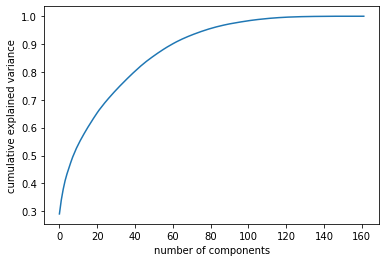

In [59]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_final_medianimputScal) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');

In [60]:
pca = PCA(0.995).fit(df_final_medianScal)
pca.n_components_

117

After applying the PCA to the model, 117 features are required to explain the 99,5% variance of the data.

In [61]:
print(pca.components_) 

[[ 1.25198789e-01 -8.07361458e-03 -2.63639222e-04 ...  3.25698027e-02
   1.81643587e-03  2.91584631e-03]
 [ 1.34570291e-02 -7.50770815e-03  1.71185787e-04 ... -1.09432449e-01
   1.38297628e-02  1.66268264e-02]
 [-1.66005489e-02  1.96992140e-02 -6.46732009e-04 ...  1.27892659e-02
   1.37688273e-02  1.86766993e-02]
 ...
 [-2.73890266e-02  8.92934941e-03  1.86165567e-06 ...  1.33795282e-03
  -1.17606201e-03  6.77953681e-04]
 [-1.41101522e-01  1.18462580e-02 -3.23508622e-05 ... -1.17565981e-02
  -1.89162949e-03 -4.60706400e-03]
 [ 1.47542472e-01  5.62031412e-03 -3.16855223e-05 ... -1.80898115e-02
   1.51784549e-03 -5.52387268e-03]]


In [62]:
print(pca.explained_variance_) 

[7.19180863e-04 1.24551018e-04 9.43955675e-05 7.65561715e-05
 6.03892677e-05 5.22412562e-05 5.00002643e-05 4.72106738e-05
 4.08056096e-05 3.82248109e-05 3.40194121e-05 3.31173748e-05
 3.08391088e-05 2.96993268e-05 2.89325870e-05 2.82704728e-05
 2.72036957e-05 2.67979068e-05 2.60781678e-05 2.57543591e-05
 2.49906503e-05 2.38830349e-05 2.17330337e-05 2.16528309e-05
 2.09799919e-05 2.02644979e-05 1.94118775e-05 1.90947760e-05
 1.88212560e-05 1.85983330e-05 1.81330652e-05 1.78931310e-05
 1.74960118e-05 1.71931851e-05 1.68804196e-05 1.68254435e-05
 1.67009657e-05 1.65436004e-05 1.63397537e-05 1.56393843e-05
 1.55377720e-05 1.53909385e-05 1.53498630e-05 1.47985929e-05
 1.42654821e-05 1.39086995e-05 1.34473869e-05 1.28960722e-05
 1.24589815e-05 1.22195290e-05 1.21452587e-05 1.17672047e-05
 1.16684833e-05 1.13706451e-05 1.11271840e-05 1.09132242e-05
 1.07679820e-05 1.03252773e-05 9.88270539e-06 9.73139109e-06
 9.35547707e-06 9.27126907e-06 8.87257337e-06 8.45448805e-06
 8.18758534e-06 7.760238

In [63]:
pca = PCA(117)
projected_medianScal = pca.fit_transform(df_final_medianScal)

In [64]:
projected_medianScal.shape

(60000, 117)

In [65]:
df_pca_medianScal = pd.DataFrame(projected_medianScal)
df_pca_medianScal["class"] = df["class"]
df_pca_medianScal

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,class
0,0.008625,-0.004941,0.006317,-0.000276,0.002936,-0.001334,-0.000015,0.000475,-0.003206,0.002313,...,0.001121,-0.001914,0.000779,-0.001256,0.000562,-0.000157,0.000064,0.000968,-0.002309,neg
1,-0.002387,-0.002152,-0.000007,-0.000474,0.000240,-0.000764,-0.000018,0.000463,0.001460,-0.000247,...,-0.000127,-0.000091,0.000009,0.000227,-0.000403,0.000178,-0.002689,0.000158,-0.000266,neg
2,-0.004661,-0.000453,-0.000909,-0.000433,0.000655,0.000077,-0.000040,-0.000671,-0.000801,0.000048,...,0.000155,0.000095,-0.000291,0.000052,0.000228,-0.000173,-0.000005,-0.000046,-0.000112,neg
3,-0.011994,0.001090,-0.002196,0.001025,-0.000611,0.000714,-0.000045,0.000837,0.001499,-0.000688,...,-0.000127,-0.000105,0.000238,0.000087,-0.000077,0.000045,0.000115,-0.000128,0.000075,neg
4,0.000876,-0.000611,0.002426,-0.002217,0.000903,-0.000034,-0.000015,-0.000474,-0.002229,0.000874,...,-0.000503,0.001064,0.000090,0.000145,-0.000152,-0.000037,-0.000442,-0.000456,-0.000221,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.017862,-0.005553,0.004856,-0.005806,0.004228,-0.002823,0.000041,-0.001822,-0.001205,0.001894,...,-0.000653,-0.000221,-0.000085,0.001952,-0.002636,0.000572,-0.000461,-0.000440,-0.000210,neg
59996,-0.011642,0.000719,-0.002015,0.001061,-0.000170,0.000490,-0.000055,0.000708,0.000519,-0.000249,...,-0.000234,0.000181,0.000049,0.000131,0.000017,0.000171,0.000119,0.000047,0.000003,neg
59997,-0.012050,0.000716,-0.002316,0.001177,-0.000303,0.000552,-0.000057,0.000747,0.000893,-0.000287,...,-0.000213,0.000180,0.000013,0.000019,0.000030,0.000140,0.000183,0.000066,-0.000041,neg
59998,0.009211,-0.010606,0.007900,-0.001343,0.005683,-0.007304,0.000024,0.000545,-0.002882,0.004384,...,-0.000127,-0.000328,-0.001475,0.000814,0.000570,0.001293,0.001057,-0.003096,0.002330,neg


# 4 - Session
## Curse of Dimensionality.

The Curse of Dimensionality describes the explosive nature of increasing data dimensions and its resulting exponential increase in computational efforts required for its processing and/or analysis.
This phenomenon occurs when a dataset has many attributes or dimensions/features (typically hundreds or thousands).
Classic examples of the presence of the Curse of Dimensionality are applications involving imaging, audio, or DNA sequencing.
The main problem that this phenomenon causes is the exponential sparsity of the representativeness hyperspace, as the dimensionality increases, it is more likely that in a neighborhood of a point there is no other distinct point, that is, causing the isolation of the points. And adding more information to the data can improve the quality of data but practically increases the noise and redundancy during its analysis and the performance deteriorates.

Hughes (1968) in his study concluded that with a fixed number of training samples, the predictive power of any classifier first increases as the number of dimensions increases, but after a certain value of a number of dimensions, the performance deteriorates. Thus, the phenomenon of the curse of dimensionality is also known as Hughes phenomenon.

In conclusion, the Curse of Dimensionality can cause distortions in the idea of distance where the points will be farthest from each other, where previously proximity can give way to the extreme distance.
Overfitting, as points tend to be more alone in hyperspace,
multicollinearity, mainly in datasets with few records implies a performance reduction.
Reduction of hyperspace representation, where to use more attributes, it is important to have more records. [1],[4],[7]

## Conclusion

The main challenges of the dataset was the extreme imbalance in the dataset and the huge percentage of missing values. Also, the features in the dataset are anonymized for proprietary reasons. i.e. the definition of each feature is unknown.
The missing data issue is handled using the median to fill the missing data and after using L2 normalizing to proportional to each other without changing the shape of the dataset before applying the PCA to dimensionally reduce the data to the number of features I have discovered.

                                                Works Cited

[1] **Choudhury, Ambika. “Curse of Dimensionality and What Beginners Should Do to Overcome It.” Analytics India Magazine, 22 May 2019**, analyticsindiamag.com/curse-of-dimensionality-and-what-beginners-should-do-to-overcome-it/. **Accessed 29 Mar. 2022.**


[2] **Ilyas, Ihab F, and Chu Xu. Data Cleaning. San Rafael] Association For Computing Machinery, 2019.**

[3] **Jolliffe, I T. Principal Component Analysis. New York ; London, Springer, 2011.**


[4] **Karanam, Shashmi. “Curse of Dimensionality — a “Curse” to Machine Learning.” Medium, 11 Aug. 2021,** towardsdatascience.com/curse-of-dimensionality-a-curse-to-machine-learning-c122ee33bfeb. **Accessed 28 Mar. 2022.**

[5] **Kumar, Ajitesh. “PCA Explained Variance Concepts with Python Example.” Data Analytics, 8 Aug. 2020,** vitalflux.com/pca-explained-variance-concept-python-example/. **Accessed 16 Mar. 2022.**

[6] **Ph.D, Sadrach Pierre. “Pandas Tricks for Imputing Missing Data.” Medium, 8 June 2020,** towardsdatascience.com/pandas-tricks-for-imputing-missing-data-63da3d14c0d6. **Accessed 23 Mar. 2022.**

[7] **Powell, Warren B. Approximate Dynamic Programming : Solving the Curses of Dimensionality. Hoboken, N.J., Wiley, 2011.**

[8] **Sullivan, John. “Data Cleaning with Python and Pandas: Detecting Missing Values.” Medium, 5 Oct. 2018,** towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b. **Accessed 20 Mar. 2022.**
